In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Simulated sample dataset (replace with your own CSV if needed)
data = {
    'DATE OCC': pd.date_range(start='1/1/2023', periods=500, freq='D'),
    'TIME OCC': np.random.choice(range(0, 2400, 100), 500),
    'AREA NAME': np.random.choice(['Central', '77th Street', 'Hollywood', 'Mission'], 500),
    'Crm Cd Desc': np.random.choice(['Assault with Deadly Weapon', 'Burglary', 'Vehicle Theft'], 500)
}
df = pd.DataFrame(data)
df.head()


,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc
0,2023-01-01,2100,77th Street,Vehicle Theft
1,2023-01-02,200,Central,Vehicle Theft
2,2023-01-03,0,Central,Assault with Deadly Weapon
3,2023-01-04,1400,Central,Burglary
4,2023-01-05,1000,Mission,Burglary


In [16]:
df

,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Hour,Area_Code,Crime_Code,Month
0,2023-01-01,2100,77th Street,Vehicle Theft,21,0,2,2023-01
1,2023-01-02,200,Central,Vehicle Theft,2,1,2,2023-01
2,2023-01-03,0,Central,Assault with Deadly Weapon,0,1,0,2023-01
3,2023-01-04,1400,Central,Burglary,14,1,1,2023-01
4,2023-01-05,1000,Mission,Burglary,10,3,1,2023-01
...,...,...,...,...,...,...,...,...
495,2024-05-10,300,77th Street,Assault with Deadly Weapon,3,0,0,2024-05
496,2024-05-11,600,Mission,Vehicle Theft,6,3,2,2024-05
497,2024-05-12,300,77th Street,Burglary,3,0,1,2024-05
498,2024-05-13,2300,77th Street,Assault with Deadly Weapon,23,0,0,2024-05


In [3]:
df['Hour'] = df['TIME OCC'] // 100
le_area = LabelEncoder()
le_crime = LabelEncoder()

df['Area_Code'] = le_area.fit_transform(df['AREA NAME'])
df['Crime_Code'] = le_crime.fit_transform(df['Crm Cd Desc'])

df[['DATE OCC', 'Hour', 'AREA NAME', 'Area_Code', 'Crm Cd Desc', 'Crime_Code']].head()


,DATE OCC,Hour,AREA NAME,Area_Code,Crm Cd Desc,Crime_Code
0,2023-01-01,21,77th Street,0,Vehicle Theft,2
1,2023-01-02,2,Central,1,Vehicle Theft,2
2,2023-01-03,0,Central,1,Assault with Deadly Weapon,0
3,2023-01-04,14,Central,1,Burglary,1
4,2023-01-05,10,Mission,3,Burglary,1


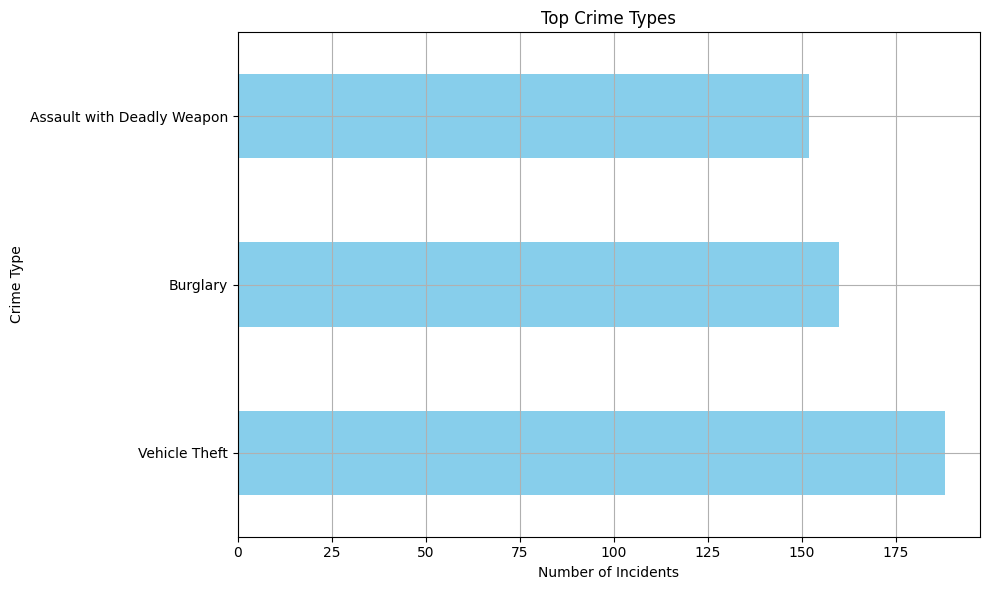

In [4]:
plt.figure(figsize=(10,6))
df['Crm Cd Desc'].value_counts().plot(kind='barh', color='skyblue')
plt.title("Top Crime Types")
plt.xlabel("Number of Incidents")
plt.ylabel("Crime Type")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp-d\AppData\Local\Temp\ipykernel_12880\1853076373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, order=sorted(df['Hour'].unique()), palette='viridis')


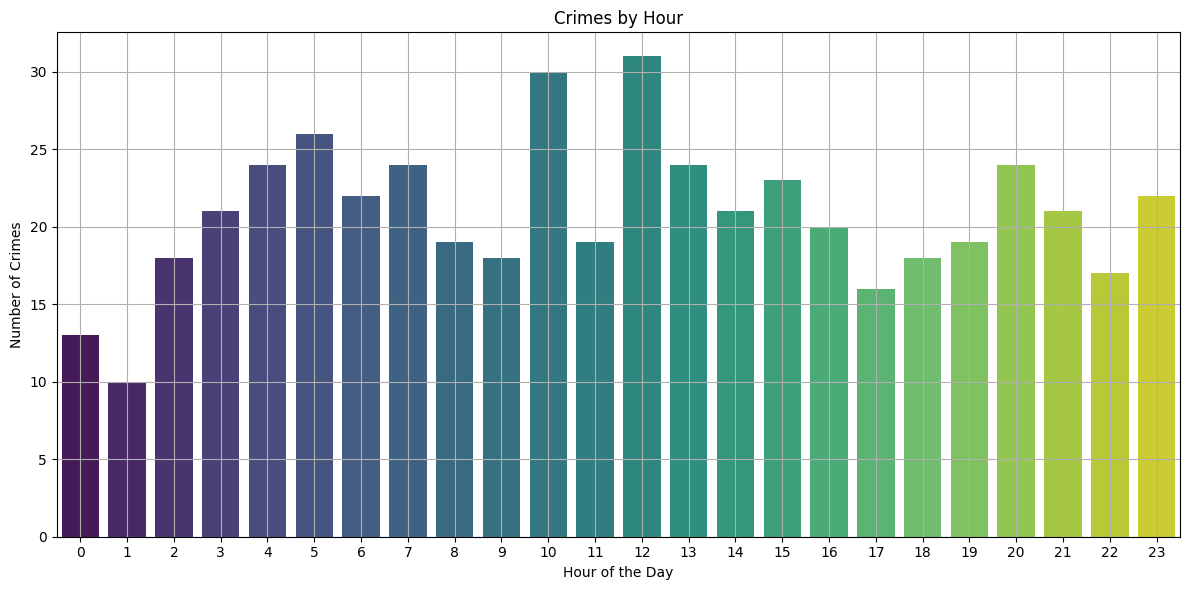

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='Hour', data=df, order=sorted(df['Hour'].unique()), palette='viridis')
plt.title("Crimes by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
X = df[['Hour', 'Area_Code']]
y = df['Crime_Code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le_crime.classes_)

print("✅ Accuracy:", round(accuracy * 100, 2), "%\n")
print("🔢 Confusion Matrix:\n", conf_matrix)
print("\n📋 Classification Report:\n", report)


✅ Accuracy: 33.33 %

🔢 Confusion Matrix:
 [[17 12 22]
 [14 17 22]
 [14 16 16]]

📋 Classification Report:
                             precision    recall  f1-score   support

Assault with Deadly Weapon       0.38      0.33      0.35        51
                  Burglary       0.38      0.32      0.35        53
             Vehicle Theft       0.27      0.35      0.30        46

                  accuracy                           0.33       150
                 macro avg       0.34      0.33      0.33       150
              weighted avg       0.34      0.33      0.34       150



In [9]:
test_area = "77th Street"
hour = 14
area_code = le_area.transform([test_area])[0]
prediction = model.predict([[hour, area_code]])
crime_label = le_crime.inverse_transform(prediction)

print(f"🕵️ Predicted crime for {test_area} at {hour}:00 is likely:", crime_label[0])


🕵️ Predicted crime for 77th Street at 14:00 is likely: Vehicle Theft


C:\Users\hp-d\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


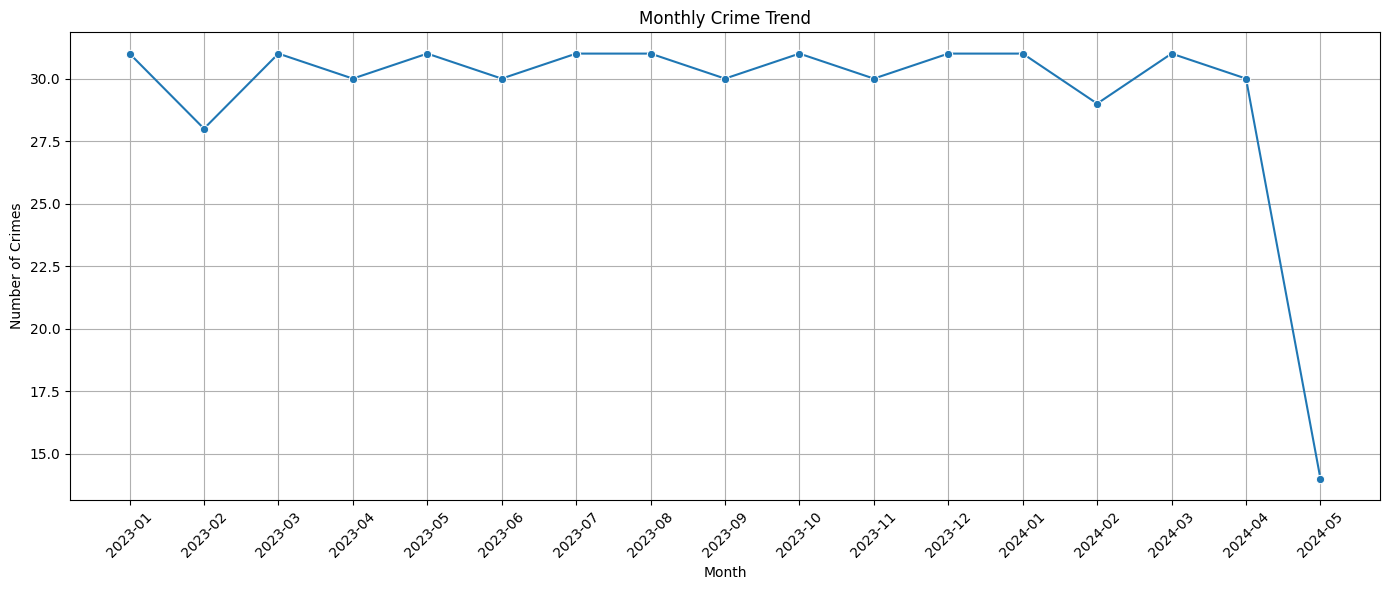

In [10]:
# Convert date if not already in datetime
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

# Group by month and count
df['Month'] = df['DATE OCC'].dt.to_period('M').astype(str)
monthly_crimes = df.groupby('Month').size().reset_index(name='Crime Count')

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_crimes, x='Month', y='Crime Count', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Crime Trend")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\hp-d\AppData\Local\Temp\ipykernel_12880\756644699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_counts.index, y=area_counts.values, palette='coolwarm')


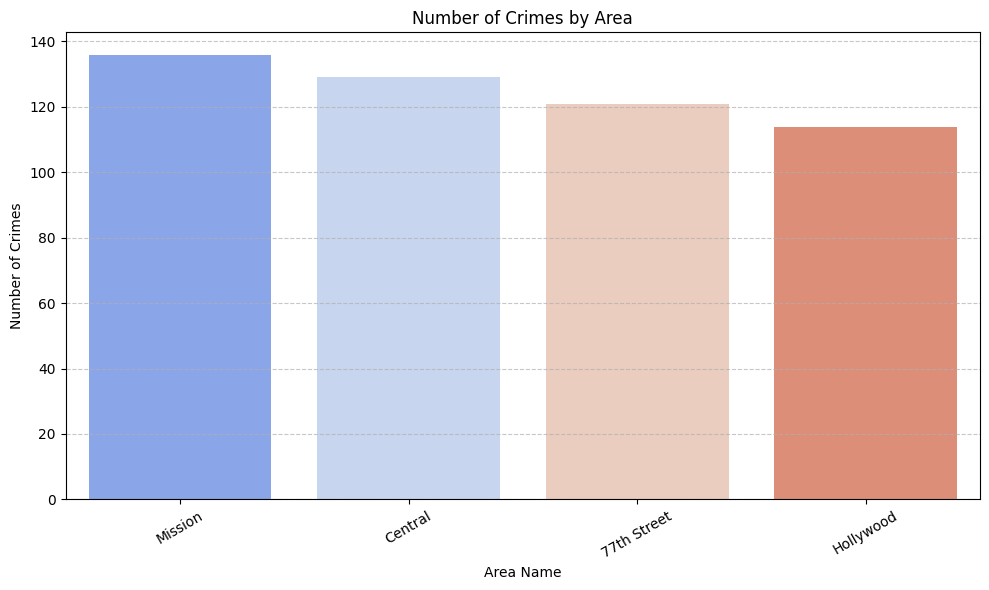

In [13]:
# Count crimes reported in each area
plt.figure(figsize=(10,6))
area_counts = df['AREA NAME'].value_counts()

sns.barplot(x=area_counts.index, y=area_counts.values, palette='coolwarm')
plt.title("Number of Crimes by Area")
plt.xlabel("Area Name")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

